

# Project: Investigate a Dataset - [Patients No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

In [1]:
#importing impotant packages that we use in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In the data wrangling process we will load data and clean it and make it ready for analysis



In [3]:
#loading data of the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# showing the first 5 rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#exploring shape of data
df.shape

(110527, 14)

These Dataset contain 110527 appointments(rows) and 14 columns

In [6]:
#Take a look on the information of the dataset if there any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#knowing the types of the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#checking for duplications of rows
df.duplicated().sum()

0

There is no duplication in this dataset

In [9]:
#number of unique values
df.PatientId.nunique()

62299

62299 put of 110527 are unique

In [10]:
#checking the number of duplications of ids
df.PatientId.duplicated().sum()

48228

In [11]:
#checking the number of dublications of patients ids and Noshow
df.duplicated(['PatientId', 'No-show']).sum()

38710

There are 38710 patients ids have the same status of show or no-show, I will remove them in data cleaning

In [12]:
#describing our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here are some statistics the mean of age is 37 and the maximum is 115 and the minimum age is -1 its a mistake will drop this row in data cleaning

In [13]:
#knowing which row has a -1 in age
negative_age = df.query('Age == "-1"')
negative_age.index                      

Int64Index([99832], dtype='int64')


### Data Cleaning



In [14]:
#dropping the row with -1 age
df.drop(negative_age.index, inplace=True)

In [15]:
#checking that we had dropped the negative age
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [16]:
#Renaming the columns
df.rename(columns = {'Hipertension' : 'Hypertension',
                     'Alcoholism' : 'Alchoholism',
                     'No-show' : 'missed_appointment',
                     'Handcap' : 'handicap'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,handicap,SMS_received,missed_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Removing duplicated ids with duplicated showing status
df.drop_duplicates(['PatientId', 'missed_appointment'], inplace=True)
df.shape

(71816, 14)

In [18]:
#Removing data that we wont use
df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,handicap,SMS_received,missed_appointment
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section


## A genaeral look on the dataset

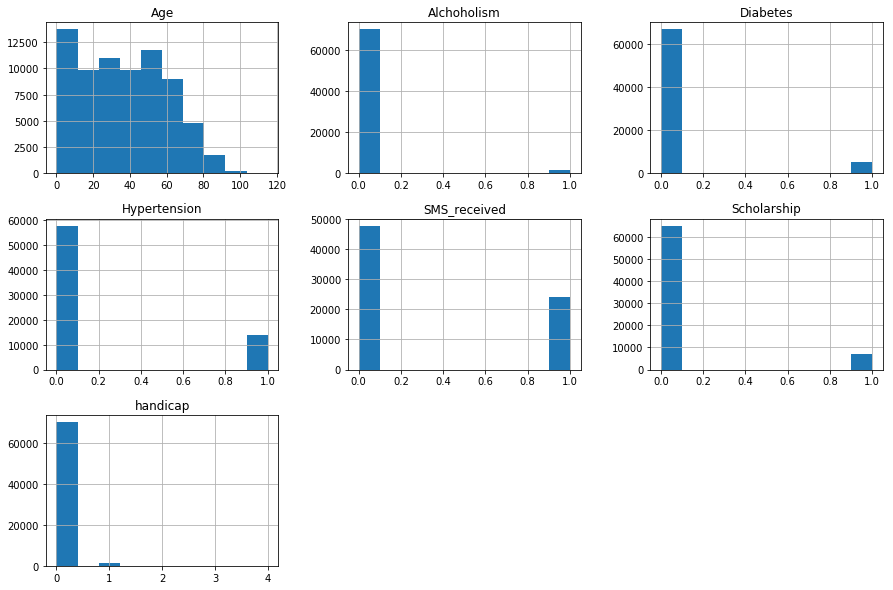

In [19]:
#Take a general look on our data with histogram
df.hist(figsize=(15,10));

About 20000 suffering from Hypertension

Number of patients that received SMS is the half who didnt

About only 8% has the Brazilian scholarship 

In [20]:
#patients that show and others that no show
missed = df['missed_appointment'] == 'Yes'
attended = df['missed_appointment'] == 'No'
print(df[missed].count())
df[attended].count()

Gender                17663
Age                   17663
Neighbourhood         17663
Scholarship           17663
Hypertension          17663
Diabetes              17663
Alchoholism           17663
handicap              17663
SMS_received          17663
missed_appointment    17663
dtype: int64


Gender                54153
Age                   54153
Neighbourhood         54153
Scholarship           54153
Hypertension          54153
Diabetes              54153
Alchoholism           54153
handicap              54153
SMS_received          54153
missed_appointment    54153
dtype: int64

Number of showed patients is 54153 and that didnt show is 17663

In [21]:
print(df[missed].mean())
df[attended].mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alchoholism      0.029440
handicap         0.017777
SMS_received     0.453094
dtype: float64


Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alchoholism      0.023600
handicap         0.020904
SMS_received     0.297232
dtype: float64

patients that recieved sms and show is less than the patients that recieved sms and didnt show, we should revise the sms text

In [22]:
brazilian_scholarship = df['Scholarship'] 
hospital_place = df['Neighbourhood']

# Investigate factors that affect the attendance rate

# Question-1 (Does age has effect on attending) 

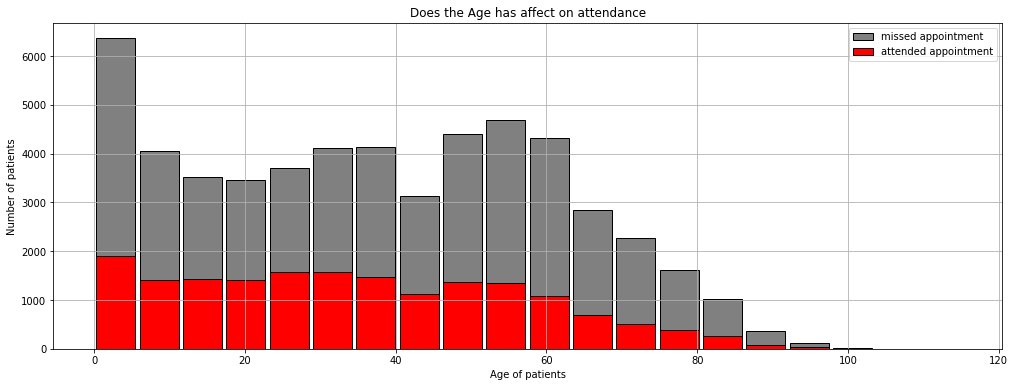

In [23]:
#Does age affect the attendance
def showing(df, affecting_factor, attended, missed):
    plt.figure(figsize=(17, 6))
    df[affecting_factor][attended].hist(color='gray',grid=True ,bins=20, label='missed appointment', edgecolor='black',rwidth=0.9)
    df[affecting_factor][missed].hist(color='red',grid=True ,bins=20, label='attended appointment', edgecolor='black',rwidth=0.9)
    plt.legend();
    plt.title('Does the {} has affect on attendance'.format(affecting_factor))
    plt.xlabel('{} of patients'.format(affecting_factor))
    plt.ylabel('Number of patients')


showing(df, 'Age', attended, missed)

#I have searched for properties of hist function in
#https://www.geeksforgeeks.org/pandas-dataframe-hist-function-in-python/

kids that is from 0 to 5 years old are the most showing(sure parents take care of their childen)and the least showing is age of above 65

# Question-2(Does drinking Alchohol affect on attending)

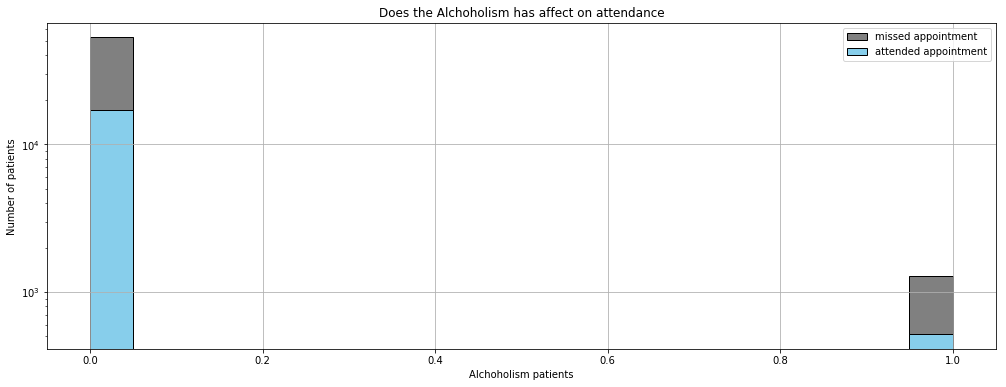

In [24]:
#Does age affect the attendance
def sshowing(df, affecting_factor, attended, missed):
    plt.figure(figsize=(17, 6))
    df[affecting_factor][attended].hist(color='gray',grid=True ,bins=20, label='missed appointment', edgecolor='black', log=True)
    df[affecting_factor][missed].hist(color='skyblue',grid=True ,bins=20, label='attended appointment', edgecolor='black')
    plt.legend();
    plt.title('Does the {} has affect on attendance'.format(affecting_factor))
    plt.xlabel('{} patients'.format(affecting_factor))
    plt.ylabel('Number of patients')



#I have searched for properties of hist function in
#https://www.geeksforgeeks.org/pandas-dataframe-hist-function-in-python/

sshowing(df, 'Alchoholism', attended, missed)

We can conclude that non-alcholic people usually attending every appointment

In [25]:
print(df['Alchoholism'][attended].mean())
print(df['Alchoholism'][missed].mean())

0.0235998005651
0.0294400724679


We can conclude that non-alcholic people usually attending every appointment because the mean of alcholic missing patients is more than attending patients  

# Question-3(Does the hospital place affect on attending)

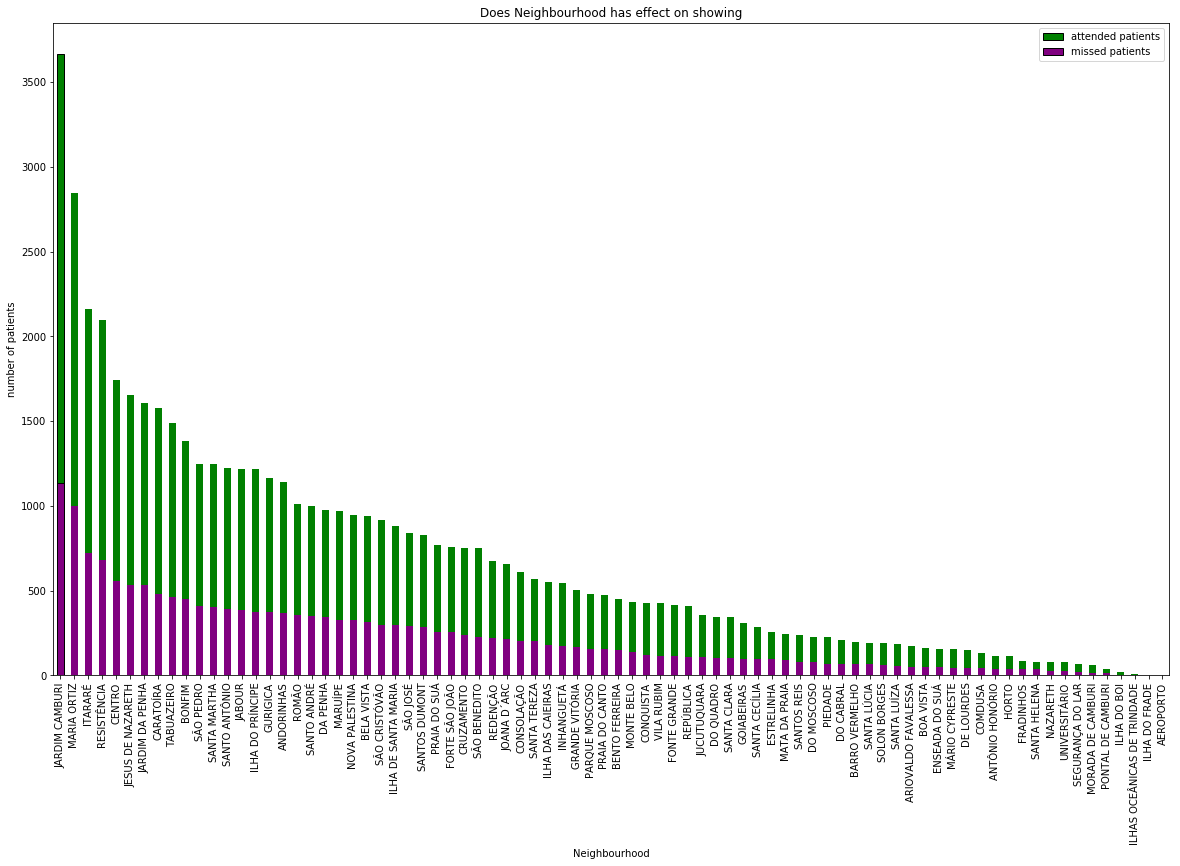

In [26]:
#Does Neighbourhood affect the showing
plt.figure(figsize=(20,12))
df.Neighbourhood[attended].value_counts().plot(kind='bar',color='green',edgecolor='black', label='attended patients')
df.Neighbourhood[missed].value_counts().plot(kind='bar',color='purple',edgecolor='black', label='missed patients')
plt.legend()
plt.title('Does Neighbourhood has effect on showing')
plt.xlabel('Neighbourhood')
plt.ylabel('number of patients');

Neighbourhood has a great effect on showing patients as the (JARDIM CAMBURI) hospital has the most attending patients

# Question-4 Does the hypertension has effect on attendance

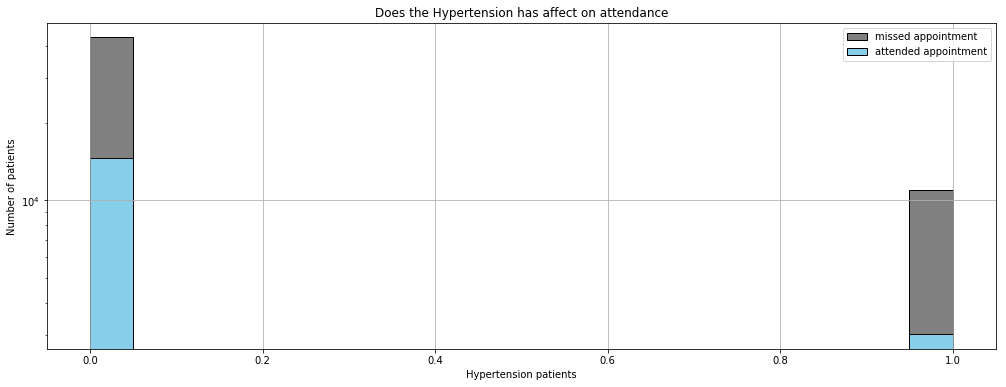

In [27]:
sshowing(df, 'Hypertension', attended, missed)

As we see here in the visualization that people with hypertension is more commitment to attend their medical appointment

# Question-5(Does the Brazilian welfare scholarship has effect on showing)

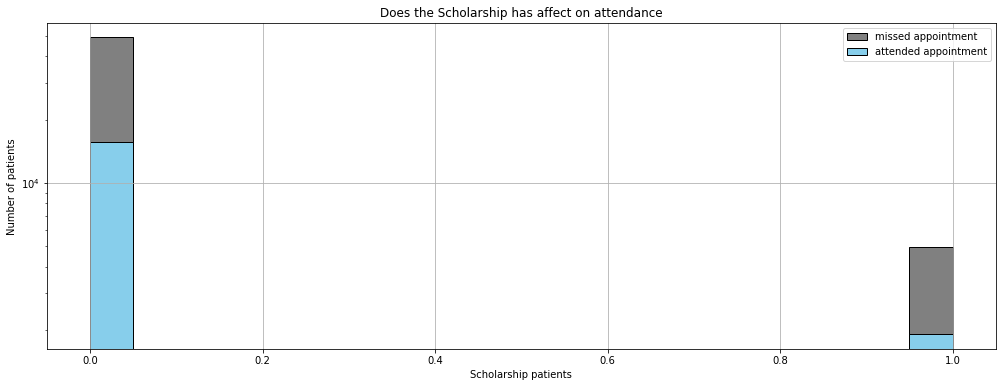

In [28]:
sshowing(df, 'Scholarship', attended, missed)

This means that patients who is not enrolled in brazilian welfare scholarship is more commited to attent their medical appointments 

# Question-6(Does age and diseases(Hypertension and Diabetes) mean affect the attendance)

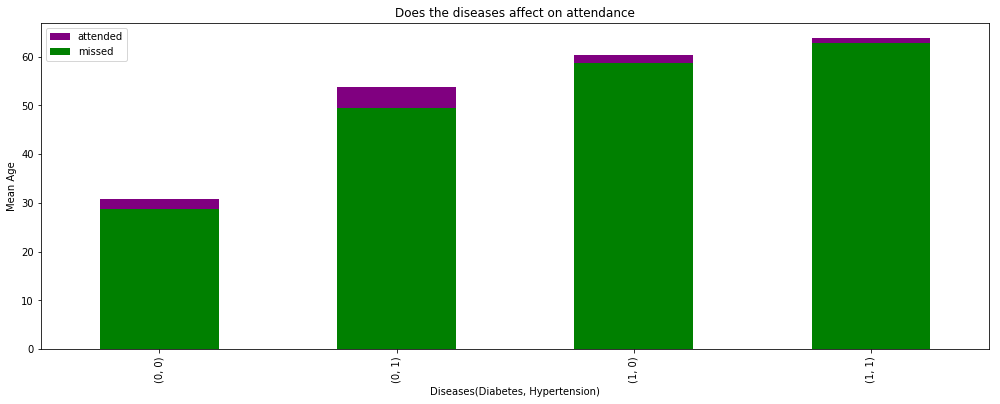

In [29]:
#Does age and diseases(Hypertension and Diabetes) together affect the attendance
plt.figure(figsize=(17,6));
df[attended].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='purple', label='attended')
df[missed].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='green', label='missed')
plt.legend();
plt.title('Does the diseases affect on attendance')
plt.xlabel('Diseases(Diabetes, Hypertension)')
plt.ylabel('Mean Age');

In [30]:
df[attended].groupby(['Hypertension', 'Diabetes']).mean()['Age'], df[missed].groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non-diseases patient that showing is 30 and non-showing is 28 mean age, and the showing patients who has hypertension and diabetes is about 64 and the non-showing is about 63 which means that there is no correlation between showing and diseses(hypertension, diabetes)

# Question-7 Does gender affect on attending

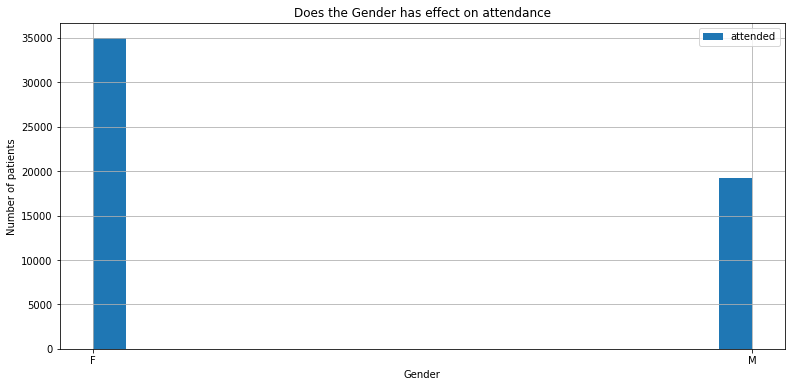

In [31]:
#Percentage of genders attending
def attend(df, affecting_factor, attended, missed):
    plt.figure(figsize=(13, 6))
    df[affecting_factor][attended].hist(bins = 20, label='attended')
    plt.legend();
    plt.title('Does the Gender has effect on attendance')
    plt.xlabel('Gender')
    plt.ylabel('Number of patients')
 
attend(df,'Gender',attended,missed)



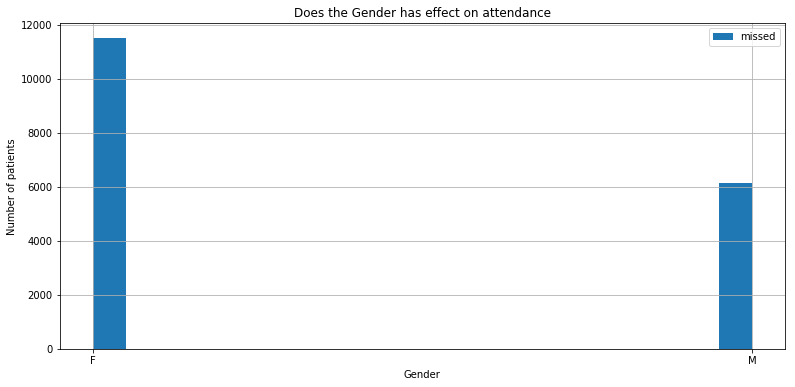

In [32]:
#Percentage of genders attending
def attend(df, affecting_factor, attended, missed):
    plt.figure(figsize=(13, 6))
    df[affecting_factor][missed].hist(bins = 20, label='missed')
    plt.legend();
    plt.title('Does the Gender has effect on attendance')
    plt.xlabel('Gender')
    plt.ylabel('Number of patients')
 
attend(df,'Gender',attended,missed)


Gender has no effect on attendance and female committed to show in medical appointments more than males

# Question-8(Does receiving sms affecting on patients showing)

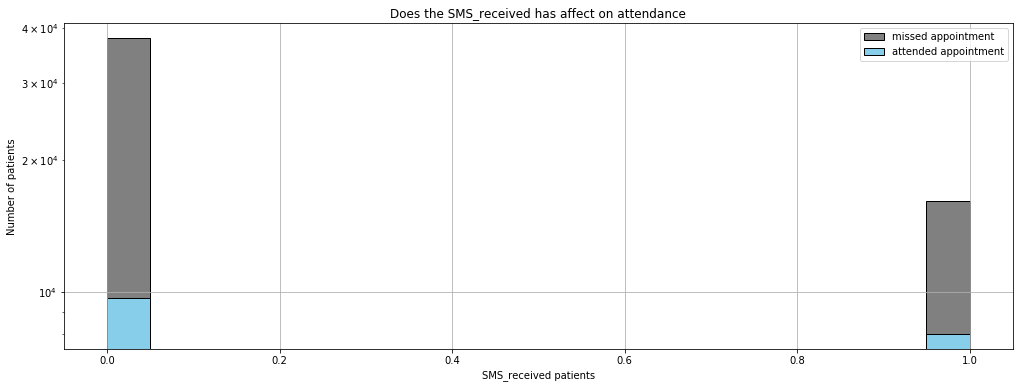

In [33]:
sshowing(df, 'SMS_received', attended, missed)

This visualization shows us that the number of patients that received sms and attended is less than the number of patients that didnt receive sms and attended (showing patients with receiving sms is less than showing patients without receiving sms)

# Question-9(Does alcohol,gender,mean age has effect on showing)

In [ ]:
#relation between Alcohol,Gender, Mean Age

plt.figure(figsize =(12, 8)) 
df[attended].groupby(['Alchoholism','Gender']).Age.mean().plot(kind='bar', color='gray', label= 'Attended')
df[missed].groupby(['Alchoholism','Gender']).Age.mean().plot(kind='bar', color='skyblue', label= 'Missed')
plt.legend()
plt.title("How old the patients who drink alchohol and attending medical appointments")
plt.xlabel("Alchoholism")
plt.ylabel("Average Age");


young alchoholism patients and and older ones commit to attend their medical appointments

<a id='conclusions'></a>
## Conclusions
Neighbourhood has effect on showing patients

patients who is not enrolled in brazilian welfare scholarship is more commited to attent their medical appointments

Non-alchoholic patients are more commited to attend the medical appointment

Age has a great effect on showing patients ages from 0 to 5 has the greatest showing rate(expecting their parents taking care for kids) and the least showing is who above 65

showing patients with receiving sms is less than showing patients without receiving sms,This means we should revise the SMS text

## Limitations

The patients who received SMS is less showing than whom didnt receive SMS

there is no Patient feedback about the hospital and the medical appointment 

No correlation between gender, diseases, enrollment in the welfare scholarship and showing of patients


In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0